# w_02 | Matplotlib

* Matplotlib tiene dos interfaces "oficiales".

* Object oriented programming.
    * Todo es un objeto.
    * Podemos llamar métodos sobre esos objetos para modificarlos.

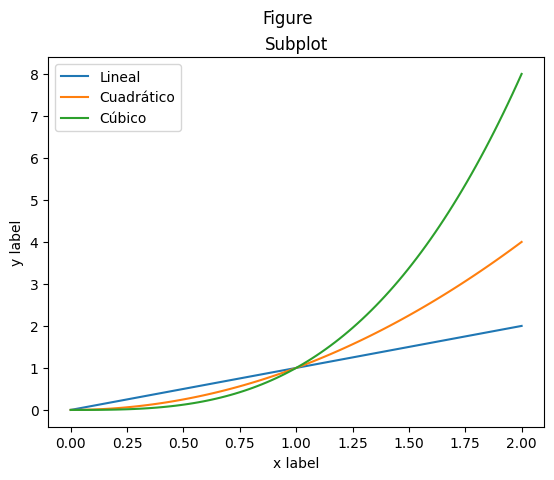

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

fig, ax = plt.subplots() # Crear figura y axes
ax.plot(x, x, label='Lineal') # Graficar datos en el ax
ax.plot(x, x**2, label='Cuadrático') # Una línea más
ax.plot(x, x**3, label='Cúbico') # Otra
ax.set_xlabel('x label') # Agregar etiquetas a los ejes
ax.set_ylabel('y label')
ax.set_title("Subplot") # Agregar un título al eje.
ax.legend() # Agregar leyenda.
fig.suptitle("Figure") # Agregar un título a toda la figure.
plt.show()

* pyplot:
    * Los axes se definen implícitamente
    * Las funciones parten del módulo `matplotlib.pyplot` y refieren al último figure/ax creado.

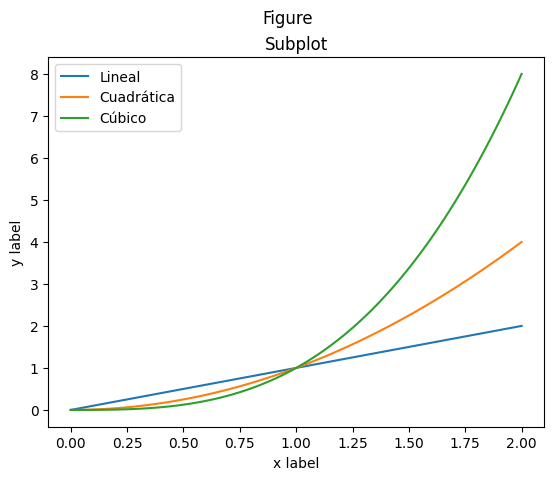

In [2]:
plt.plot(x, x, label='Lineal')
plt.plot(x, x**2, label='Cuadrática')
plt.plot(x, x**3, label='Cúbico')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Subplot")
plt.legend()
plt.suptitle("Figure")
plt.show()

* Aunque producen el mismo resultado, su "filosofía" es distinta.
    * El OOP-approach crea los objetos y los va modificando.
        * Comparable a crear un `DataFrame` e irlo modificando con `inplace=True`.
    * El pyplot-approach siempre "sabe" a qué gráfico nos referimos, y aplica los cambios sobre él mediante funciones.

* En este curso vamos a intentar guiarnos por el primero.
    * Es más flexible.
    * Es más fácil de entender qué estamos modificando.


* El flujo de trabajo usual es el siguiente
    * Crear `Figure` y `Axes` con `plt.subplots()`
        * El nombre de la función es confusa porque pareciera que se refiere a varios gráficos, pero puede ser solo 1.
        * Si quisiéramos definir solo la `Figure` usaríamos `plt.figure()`.
    * Agregar información a los `axes` y modificar a gusto.
    * Modificar `figure` a gusto.
    * `plt.show()`

Podemos graficar de manera individual cada una de las funciones planteadas.

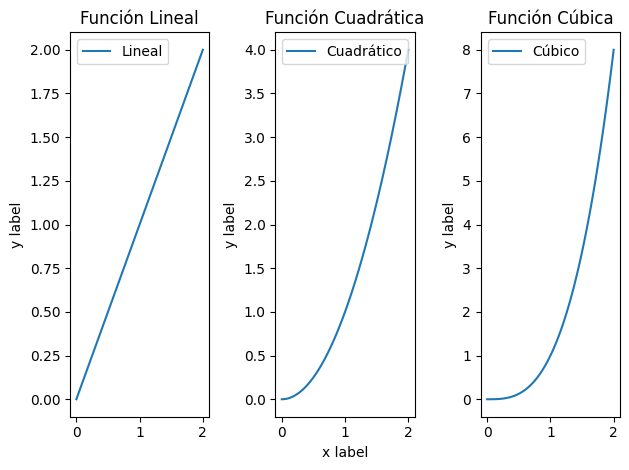

In [3]:
# Crear una matriz de subplots con 3 filas y 1 columna
fig, axes = plt.subplots(nrows=1, ncols=3)

# Graficar datos en el primer subplot (fila 0)
axes[0].plot(x, x, label='Lineal')
axes[0].set_ylabel('y label')
axes[0].set_title('Función Lineal')
axes[0].legend()

# Graficar datos en el segundo subplot (fila 1)
axes[1].plot(x, x**2, label='Cuadrático')
axes[1].set_ylabel('y label')
axes[1].set_xlabel('x label')
axes[1].set_title('Función Cuadrática')
axes[1].legend()

# Graficar datos en el tercer subplot (fila 2)
axes[2].plot(x, x**3, label='Cúbico')
axes[2].set_ylabel('y label')
axes[2].set_title('Función Cúbica')
axes[2].legend()

plt.tight_layout()
plt.show()

Así como también de forma mas eficiente.

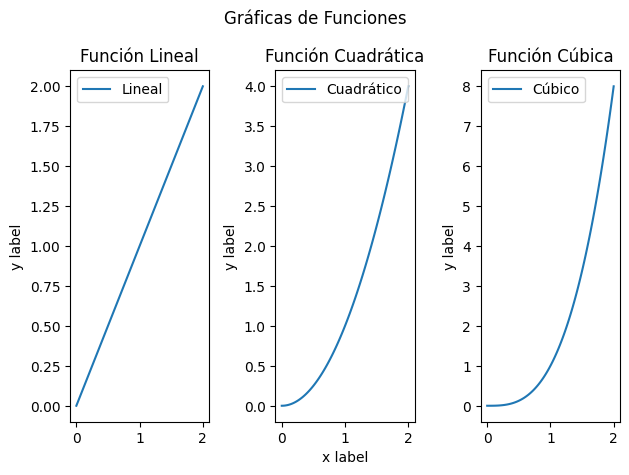

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

# Crear una matriz de subplots con 3 filas y 1 columna
fig, axes = plt.subplots(nrows=1, ncols=3)

# Listas de nombres de ejes, títulos y funciones
name_label = ['Lineal','Cuadrático','Cúbico']
name_title = ['Función Lineal','Función Cuadrática','Función Cúbica']
funciones = [x,x**2,x**3]

for i in range(len(axes)):
  axes[i].plot(x, funciones[i], label=name_label[i])
  if i == 1:
    axes[i].set_xlabel('x label')
  axes[i].set_ylabel('y label')
  axes[i].set_title(name_title[i])
  axes[i].legend()

# Ajustar la disposición de los subplots y agregar un título a toda la figura
fig.suptitle('Gráficas de Funciones')
plt.tight_layout()
plt.show()

* Leamos algunos datos.

In [5]:
import pandas as pd
url = "https://catalogodatos.gub.uy/dataset/45cad49d-9dfa-4ce5-afe4-6ba2849a907c/resource/6a32347d-335e-4500-b56d-166b8a733502/download/ingei.xlsx"
data = pd.read_excel(url)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sector             1595 non-null   object 
 1   Categoría          1595 non-null   object 
 2   Subcategoría       1595 non-null   object 
 3   Año                1595 non-null   int64  
 4   Tipo de GEI        1595 non-null   object 
 5   GEI                1595 non-null   object 
 6   Gg Gas             1595 non-null   float64
 7   Gg CO2 - eq (GWP)  929 non-null    object 
 8   Gg CO2 - eq (GTP)  929 non-null    object 
 9   Notation Key       0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 124.7+ KB


In [7]:
data.head()

,Sector,Categoría,Subcategoría,Año,Tipo de GEI,GEI,Gg Gas,Gg CO2 - eq (GWP),Gg CO2 - eq (GTP),Notation Key
0,1 - Energía,1.A - Actividades de quema de combustibles,1.A.1 - Industrias de la Energía,1990,Indirecto,NOx,0.9451,NaN,NaN,NaN
1,1 - Energía,1.A - Actividades de quema de combustibles,1.A.1 - Industrias de la Energía,1990,Indirecto,CO,0.0803,NaN,NaN,NaN
2,1 - Energía,1.A - Actividades de quema de combustibles,1.A.1 - Industrias de la Energía,1990,Indirecto,COVDM,0.0149,NaN,NaN,NaN
3,1 - Energía,1.A - Actividades de quema de combustibles,1.A.1 - Industrias de la Energía,1990,Indirecto,SO2,8.4582,NaN,NaN,NaN
4,1 - Energía,1.A - Actividades de quema de combustibles,1.A.2 - Industrias Manufactureras y de la Cons...,1990,Indirecto,NOx,2.8512,NaN,NaN,NaN


* Y un primer dataset para graficar.

1. `data.groupby(["Año", "Sector"])`: Esta línea agrupa los datos del DataFrame data por las columnas "Año" y "Sector". La función groupby() se utiliza para dividir los datos en grupos basados en los valores únicos de las columnas especificadas. En este caso, queremos agrupar los datos por el año y el sector.

2. `.agg({"Gg Gas": "sum"})`: Después de agrupar los datos, la función agg() se utiliza para realizar una agregación en cada grupo. En este caso, estamos agregando la columna "Gg Gas" calculando la suma de sus valores dentro de cada grupo. El resultado de esta operación será un DataFrame con los valores totales de "Gg Gas" para cada combinación única de año y sector.

3. `.reset_index()`: El método reset_index() se utiliza para restablecer el índice del DataFrame resultante, de modo que los índices del grupo se convierten en columnas nuevamente. Esto es útil para realizar operaciones adicionales después de la agregación.

4. `.pivot(index="Año", columns="Sector", values="Gg Gas")`: Finalmente, el método pivot() se utiliza para transformar el DataFrame resultante de la agregación en una tabla pivote. En esta tabla, los valores de la columna "Sector" se convierten en columnas y los valores de la columna "Año" se convierten en índices (filas). El valor que se utiliza para rellenar la tabla es el total de "Gg Gas" que se calculó en la operación de agregación anterior.

In [8]:
data_años = data.groupby(["Año", "Sector"]).agg({"Gg Gas": "sum"}).reset_index().pivot(index="Año", columns="Sector", values="Gg Gas")
data_años.columns = ["Energía", "Industria", "Agricultura", "Desechos", "Otros"]
data_años.tail()

,Energía,Industria,Agricultura,Desechos,Otros
Año,,,,,
2016,6535.264987,518.320593,-12997.924943,52.454072,888.709153
2017,6068.173464,545.938386,-11785.713182,55.046126,758.473877
2018,6519.093529,534.636494,-9570.196659,54.998792,919.156342
2019,6381.096251,475.137897,-10733.471466,58.157454,932.287174
2020,6440.535356,479.316220,-8931.835438,59.079778,503.893125


* El método `plot()` de `Axes` grafica líneas por defecto.
    * Toma argumentos x e y de iguales dimensiones.
        * Quiere decir que no podemos graficar todas las series de una vez.
        * En estos casos se llama repetidas veces al método para agregar distintas series.

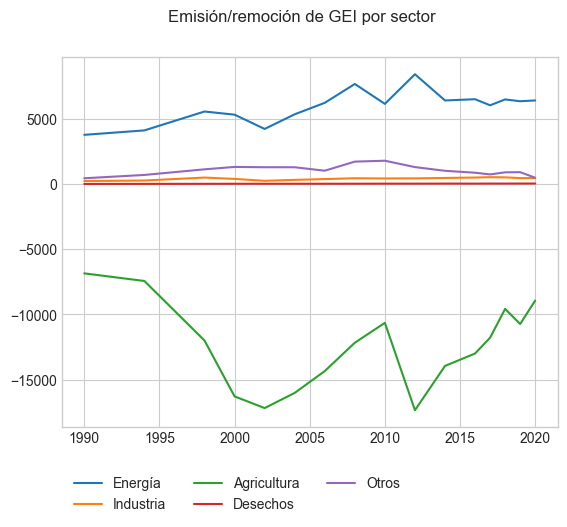

In [9]:
# plt.style.use("seaborn-whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots()

for col in data_años.columns:

    ax.plot(data_años.index, data_años[col])

ax.legend(data_años.columns, bbox_to_anchor=(0, -0.1), loc="upper left", ncol=3)

fig.suptitle("Emisión/remoción de GEI por sector")

plt.show()

* La leyenda se tiene que agregar explícitamente.
    * La ubicación por defecto puede no ser óptima.
        * El parámetro `loc` de `legend()` ofrece posiciones por defecto como "upper right", pero para ubicar la leyenda por fuera es necesario usar el parámetro `bbox_to_anchor`, que define el punto de referencia.

* Podemos combinar tipos de gráficos.

C:\Users\cpiriz\AppData\Local\Temp\ipykernel_15080\3148668449.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(data_años.columns, rotation=90)


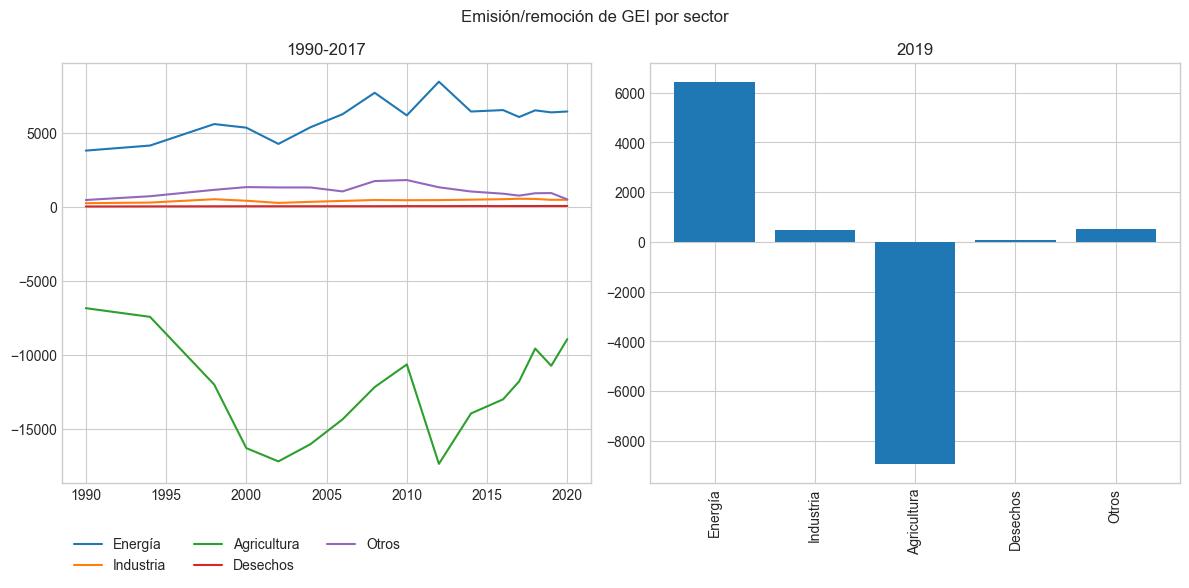

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for col in data_años.columns:
    ax[0].plot(data_años.index, data_años[col])
ax[0].legend(data_años.columns, bbox_to_anchor=(0, -0.1), loc="upper left", ncol=3)
ax[0].set_title("1990-2017")
ax[1].bar(height=data_años.iloc[-1], x=data_años.columns)
ax[1].set_xticklabels(data_años.columns, rotation=90)
ax[1].set_title("2019")
fig.suptitle("Emisión/remoción de GEI por sector")
fig.tight_layout()
plt.show()

* Notar que ahora tenemos dos `axes` y que podemos indexarlos como una lista.
    * El código del gráfico anterior cambia para referenciar al primer `axes`.
* Sobre el segundo `axes` llamamos el método `bar()` que crea un gráfico de barras verticales (`barh()` es el correspondiente horizontal).
    * Los parámetros clave son `height`, que define el alto de las barras (usualmente el dato a graficar) y `x`.
    * Para cambiar la dirección de las etiquetas fue necesario llamar al método `set_xticklabels()`.
        * El método exige redefinir las etiquetas, pero permite cambiar la rotación y otros aspectos.

* Es posible combinar las dos interfaces de MPL.
    * En este caso, cambiar la rotación de las etiquetas es mucho más simple usando `pyplot`.

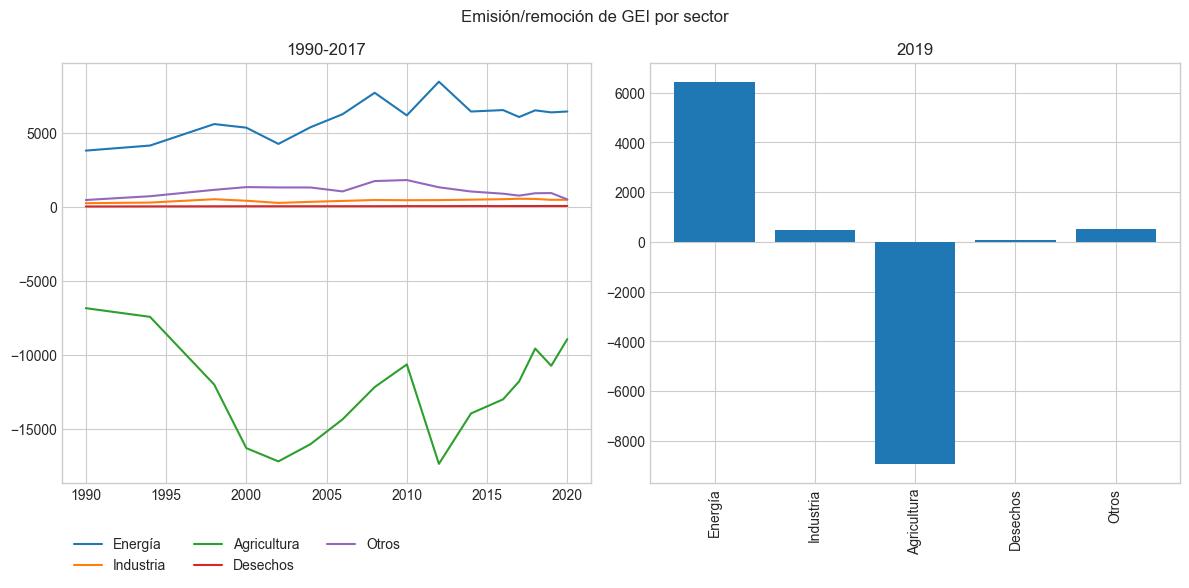

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for col in data_años.columns:
    ax[0].plot(data_años.index, data_años[col])
ax[0].legend(data_años.columns, bbox_to_anchor=(0, -0.1), loc="upper left", ncol=3)
ax[0].set_title("1990-2017")
ax[1].bar(height=data_años.iloc[-1], x=data_años.columns)
plt.xticks(rotation=90)
ax[1].set_title("2019")
fig.suptitle("Emisión/remoción de GEI por sector")
fig.tight_layout()
plt.show()

* Notar que no se le define a `plt.xticks()` el `axes` que debe modificar.

* El hecho de que podamos llamar varios métodos de gráficos sobre un mismo `axes` abre algunas posibilidades.

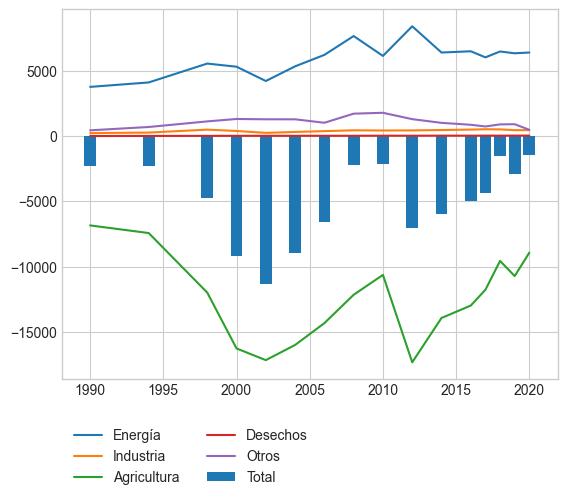

In [12]:
fig, ax = plt.subplots()
for col in data_años.columns:
    ax.plot(data_años.index,data_años[col])
ax.bar(height=data_años.sum(axis=1), x=data_años.index)
ax.legend(list(data_años.columns) + ["Total"], loc="upper left", bbox_to_anchor=(0, -0.1), ncol=2)
plt.show()

* Es posible definir disposiciones más complejas con `plt.subplot2grid()`
    * Su primer argumento es el tamaño de la grilla, y el segundo la ubicación del gráfico.
    * `colspan` y `rowspan` indican cuántas columnas y filas ocupa a apartir de su ubicación.

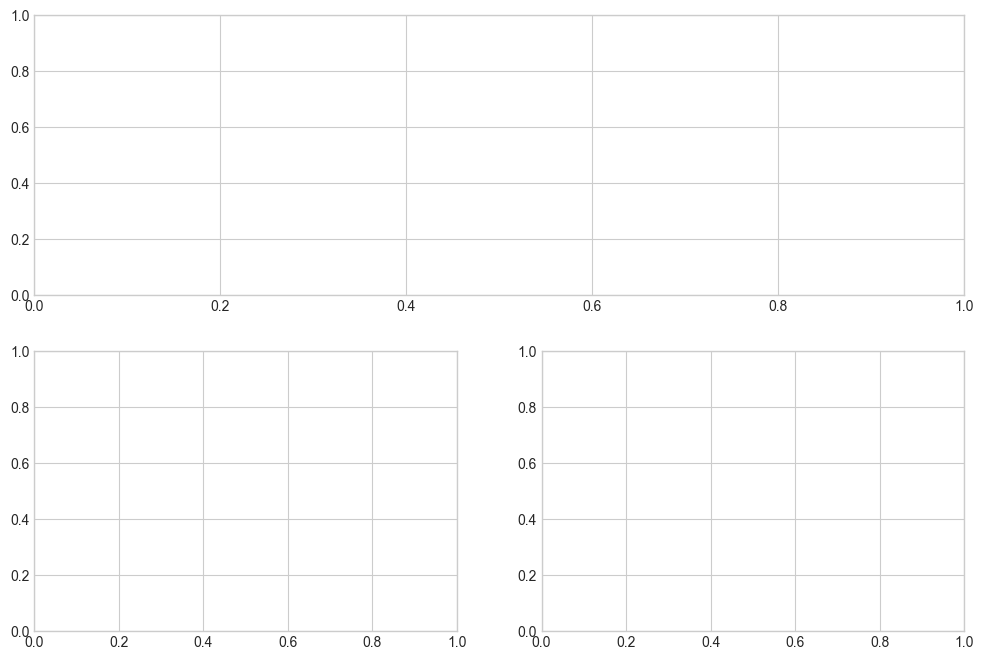

In [13]:
gridsize = (2, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3)
ax2 = plt.subplot2grid(gridsize, (1, 0))
ax3 = plt.subplot2grid(gridsize, (1, 1))
plt.show()

* Antes de armar el gráfico vamos a crear otro corte de la información.

In [14]:
data_sub = data.groupby(["Año", "Sector", "Subcategoría"]).agg({"Gg Gas": "sum"}).reset_index()
agro = data_sub.query("Sector == '3 - Agricultura, Silvicultura y Otros Usos de la Tierra'").pivot(index="Año", columns="Subcategoría", values="Gg Gas")
energia = data_sub.query("Sector == '1 - Energía'").pivot(index="Año", columns="Subcategoría", values="Gg Gas")
energia.head()

Subcategoría,1.A.1 - Industrias de la Energía,1.A.2 - Industrias Manufactureras y de la Construcción,1.A.3 - Transporte,"1.A.4 - Otros Sectores (Comercial/Institucional, Residencial, Agricola/Silvicultura/Pesca)",1.A.5 - No especificado,1.B.2 - Petróleo y Gas Natural
Año,,,,,,
1990,517.280165,586.086356,1597.403755,1083.797955,14.001321,0.915383
1994,123.486098,500.182137,2303.658164,1191.086880,22.574883,NaN
1998,607.249710,856.234637,2796.634188,1320.720958,8.728957,1.379217
2000,733.013752,720.051980,2615.129004,1271.497242,7.565576,1.458034
2002,283.084627,566.942501,2251.750507,1143.363013,5.522560,1.001550


* Una vez definido el grid podemos agregar información a los `Axes` como siempre.
* Tenemos que definir un nuevo color cycle para la gráfica de agro con `set_prop_cycle()`, porque sino se empiezan a repetir.
    * Tomamos los colores de uno de los colormaps incluidos.
* Usamos gráficos de barras apilados simplemente iterando.
* Las leyendas no son muy explicativas. Podríamos definirlas a mano.

1. `gridsize = (2, 2)`: Aquí se define el tamaño de la cuadrícula para la disposición de las subtramas. La cuadrícula tiene dos filas y dos columnas, por lo que habrá espacio para cuatro subtramas en total.

2. `fig = plt.figure(figsize=(12, 10))`: Se crea la figura principal con un tamaño de 12 pulgadas de ancho y 10 pulgadas de alto.

3. `ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3)`: Se crea la primera subtrama en la posición (0, 0) de la cuadrícula con una extensión de 3 columnas de ancho. La variable ax1 se utiliza para referenciar esta subtrama.

4. `ax2 = plt.subplot2grid(gridsize, (1, 0))`: Se crea la segunda subtrama en la posición (1, 0) de la cuadrícula. La variable ax2 se utiliza para referenciar esta subtrama.

5. `ax3 = plt.subplot2grid(gridsize, (1, 1))`: Se crea la tercera subtrama en la posición (1, 1) de la cuadrícula. La variable ax3 se utiliza para referenciar esta subtrama.

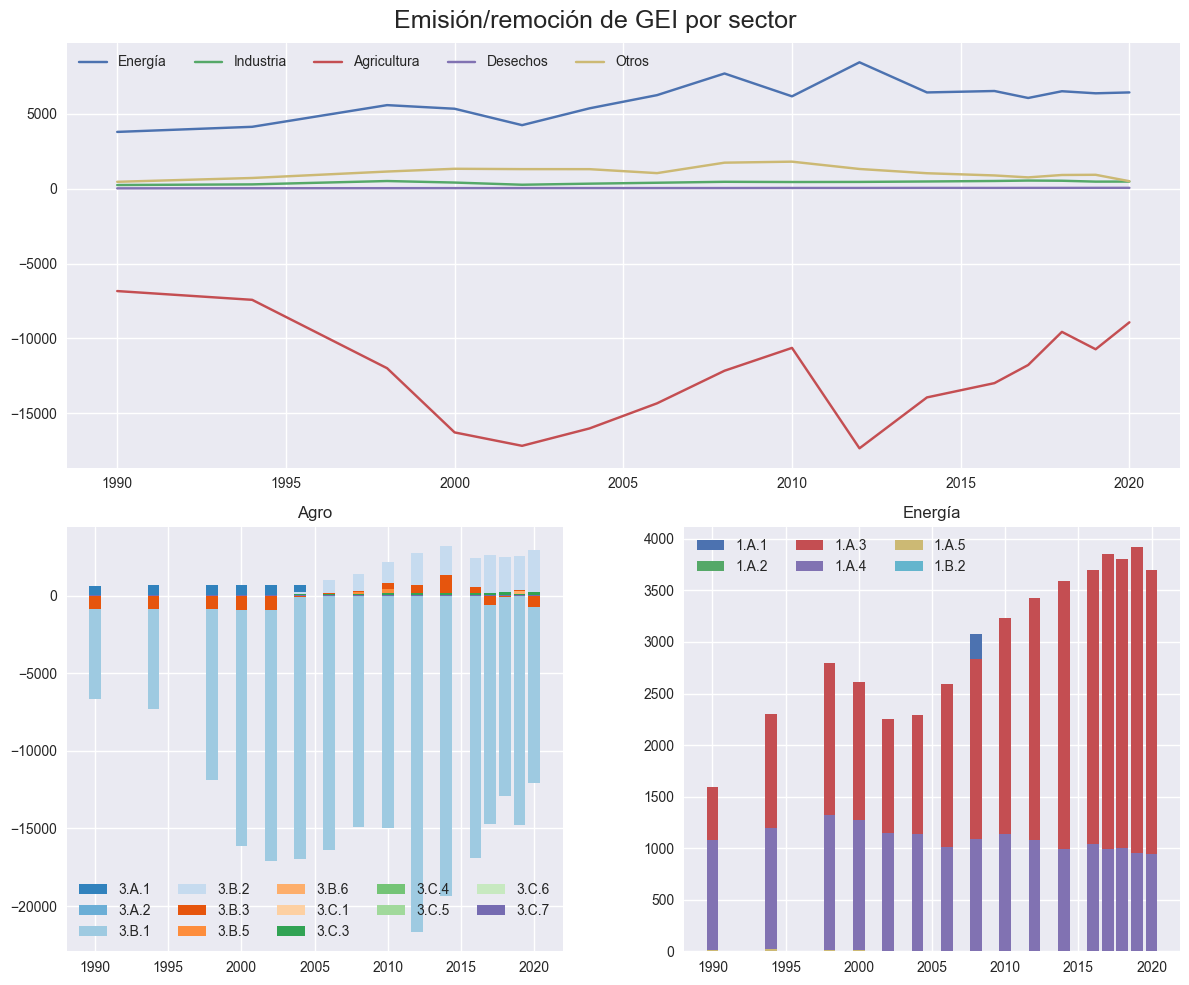

In [15]:
# plt.style.use('seaborn')
plt.style.use("seaborn-v0_8")



gridsize = (2, 2)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3)

ax2 = plt.subplot2grid(gridsize, (1, 0))

ax3 = plt.subplot2grid(gridsize, (1, 1))



for col in data_años.columns:

    ax1.plot(data_años.index, data_años[col])

ax1.legend(data_años.columns, loc="upper left", ncol=5)

cm = plt.get_cmap("tab20c")

ax2.set_prop_cycle(color=cm.colors)



for col in agro.columns:

    ax2.bar(agro.index, agro[col])

ax2.legend(agro.columns.str[:5], loc="lower left", ncol=5)

ax2.set_title("Agro")



for col in energia.columns:

    ax3.bar(energia.index, energia[col])

ax3.legend(energia.columns.str[:5], loc="upper left", ncol=3)

ax3.set_title("Energía")



fig.suptitle("Emisión/remoción de GEI por sector", size=18)

fig.tight_layout()

plt.show()

* MPL tiene varios tipos de gráficos convencionales.
    * Se puede ver una galería [en su web](https://matplotlib.org/stable/gallery/index.html).
* Veamos algunos ejemplos más allá de líneas y barras.

* Un histograma muestra la distribución de una variable.
* Se organiza en "bins", que agrupan observaciones en determinado rango.
* Para este ejemplo también usamos `Axes.axvline()` para crear líneas verticales a la altura de la media de cada subcategoría, y `Axes.text()` para agregar una etiqueta.

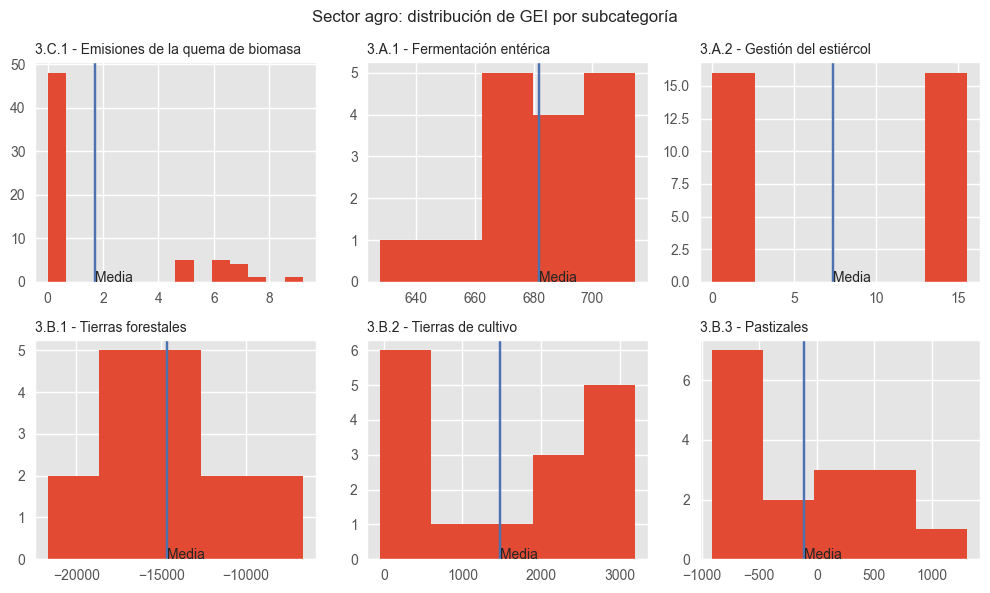

In [16]:
agro = data.loc[data["Sector"] == "3 - Agricultura, Silvicultura y Otros Usos de la Tierra"]
unique = agro["Subcategoría"].unique()

with plt.style.context("ggplot"):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    for ax, sub in zip(axes.flatten(), unique):
        sub_mean = agro.loc[agro["Subcategoría"] == sub, "Gg Gas"].mean()
        ax.hist(agro.loc[agro["Subcategoría"] == sub, "Gg Gas"], bins="auto")
        ax.axvline(sub_mean)
        ax.text(x=sub_mean, y=0, s="Media", size=10)
        ax.set_title(sub, size=10, loc="left")
fig.suptitle("Sector agro: distribución de GEI por subcategoría")
fig.tight_layout()
plt.show()

* Un boxplot muestra la distribución de una variable.
    * El rectángulo cubre el rango intercuartil (25% a 75% de las observaciones está ahí)
    * Dentro del rectángulo está la mediana, que parte las observaciones en dos mitades.
    * Los bigotes van hasta Q1(Q3) -(+) 1.5 del rango intercuartil.
        * Si no hay observaciones que los superen, el bigote se fija en el máximo(mínimo)
        * Las observaciones más allá de los bigotes se consideran outliers.

![](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)

* Vamos a armar un boxplot para cada uno de los sectores en el año 2017.
* Necesitamos tener un array con todos los datos por sector.

In [17]:
pivot = data.loc[data["Año"] == 2017, :].pivot(columns="Sector", values="Gg Gas")
pivot.head()

Sector,1 - Energía,2 - Procesos Industriales y Uso de Productos,"3 - Agricultura, Silvicultura y Otros Usos de la Tierra",4 - Desechos,6 - Partidas informativas
505,1.3540,NaN,NaN,NaN,NaN
506,0.4937,NaN,NaN,NaN,NaN
507,0.0440,NaN,NaN,NaN,NaN
508,0.6785,NaN,NaN,NaN,NaN
509,11.4948,NaN,NaN,NaN,NaN


1 - Energía tiene 33 datos
2 - Procesos Industriales y Uso de Productos tiene 33 datos
3 - Agricultura, Silvicultura y Otros Usos de la Tierra tiene 17 datos
4 - Desechos tiene 11 datos
6 - Partidas informativas tiene 14 datos


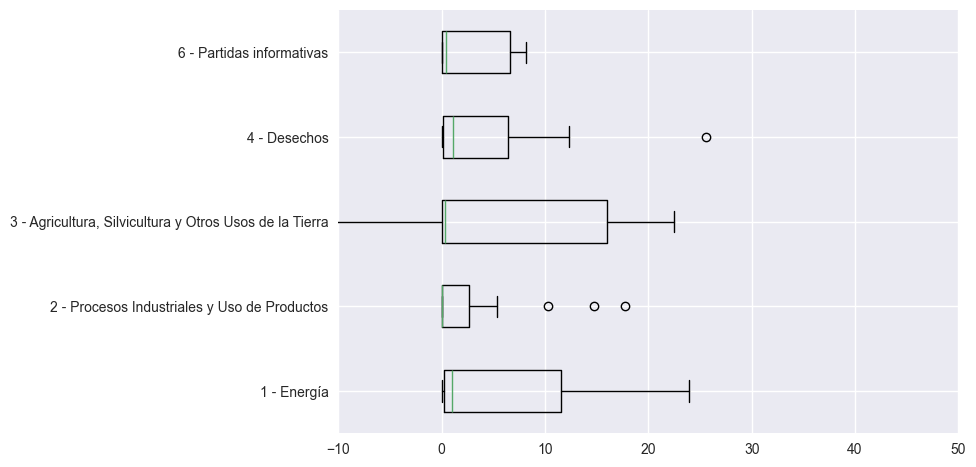

In [18]:
fig, ax = plt.subplots()
data_box = []
labels = []
for col in pivot.columns:
    aux = pivot[col].dropna()
    data_box.append(aux)
    labels.append(col)
    print(f"{col} tiene {len(aux)} datos")
ax.boxplot(data_box, labels=labels, vert=False) # showfliers = False
ax.set_xlim(-10, 50)
plt.show()

* Un scatterplot muestra la relación entre dos variables. Es funcionalmente igual a un gráfico de líneas, pero estas relaciones suelen mostrarse con puntos.
* Usamos otro dataset para este gráfico.

In [19]:
# inc = pd.read_csv("https://catalogodatos.gub.uy/dataset/239103c3-a3f4-4d3c-93f6-008198eeda62/resource/e45a435f-0968-4868-9759-2038840b836d/download/inc-ofrecimientostierra-datos-v20210804.csv", sep=";", error_bad_lines=False, decimal=",")
inc = pd.read_csv("https://catalogodatos.gub.uy/dataset/239103c3-a3f4-4d3c-93f6-008198eeda62/resource/e45a435f-0968-4868-9759-2038840b836d/download/inc-ofrecimientostierra-datos-v20210804.csv", sep=";",on_bad_lines= 'skip',decimal=",")
inc.head()

,Tipo,Plan estabilidad lechero?,Fecha ingreso trámite,Fracciones Artº5,Tipo de negocio,Tipo de negocio.1,Nº expediente,Estado de ocupación,Moneda,Precio total,Superficie total(ha),Superficie CONEAT 100 (ha),Mejoras que incluye,Forma de entrega,Forma y plazo pago,Multa por incumplimiento,Padrones
0,Por Art. 35º,NO,29/07/2024,NaN,Compraventa,Compraventa,2024-70-1-01237,Ocupado,U$S,12485200,1274.9140,1927.0000,suelos y mejoras,Arrendado hasta 01/07/25,-US$ 1.248.520 se entregó en caracter de seña ...,US$ 1.248.520,Río Negro-> Rural: 3320-124
1,Por Art. 35º,NO,29/07/2024,NaN,Compraventa,Compraventa,2024-70-1-01241,Libre,U$S,3200000,785.9814,809.5608,Suelos y mejoras,Libre,- U$S 2.825.000 conjuntamente con el otorgamie...,U$S 250.000,Durazno-> Rural: 1627
2,Por Art. 35º,NO,25/07/2024,NaN,Compraventa,Compraventa,2024-70-1-01219,Ocupado,U$S,2769308,1130.3300,802.5343,La operación comprende suelos y mejoras.,Se entregará simultáneamente con la suscripció...,a) U$S 1.000.000 simultáneamente al otorgamien...,U$S 415.396,Paysandú-> Rural: 729
3,Por Art. 35º,NO,22/07/2024,NaN,Compraventa,Compraventa,2024-70-1-01196,Libre,U$S,1375000,251.9910,280.7000,La operación comprende suelos y mejoras,El venta se realizará libre de ocupantes.,Al momento de la suscripción del negocio defin...,U$S 135.000,Río Negro-> Rural: 4414
4,Por Art. 35º,NO,22/07/2024,NaN,Compraventa,Compraventa,2024-70-1-01191,Libre,U$S,2002744,500.6862,665.1926,Suelos y mejoras,La posesión jurídica del inmueble se entregará...,120 días a contar del 14/06/24,No se estipuló multa,Cerro Largo-> Rural: 1407


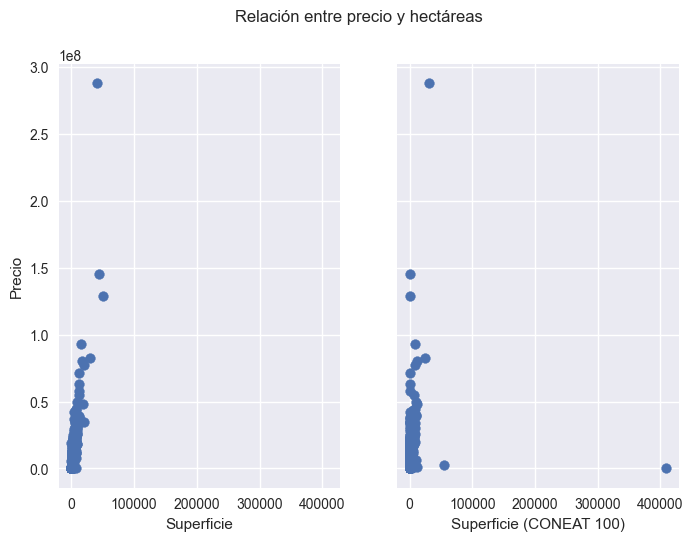

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
ax[0].scatter(inc["Superficie total(ha)"], inc["Precio total"])
ax[0].set_xlabel("Superficie")
ax[0].set_ylabel("Precio")
ax[1].scatter(inc["Superficie CONEAT 100 (ha)"], inc["Precio total"])
ax[1].set_xlabel("Superficie (CONEAT 100)")
fig.suptitle("Relación entre precio y hectáreas")
plt.show()

# Fin